### 1. KNN Background

#### 1.1 Type of algorithm

# K Nearest Neighbor Tutorial: Iris Dataset

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h: X\rightarrow Y$ so that given an unseen observation $x$, $h(x)$ can confidently predict the corresponding output $y$.


#### 1.2 Distance measure

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let $x_{i}$ be an input sample with $p$ features $(x_{i1}, x_{i2},..., x_{ip})$, $n$ be the total number of input samples $(i=1,2,...,n)$.  The Euclidean distance between sample $x_{i}$ and $x_{l}$ is is defined as:


$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

#### 1.3 Algorithm steps

STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

### 2. Importing and preperation of data

#### 2.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


C:\Users\AmayaF\AppData\Local\Temp\ipykernel_29588\1661585291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### 2.2 Load dataset, either to Google Colab or within your development environment

NOTE: Iris dataset includes three iris species with 50 samples each as well as some properties about each flower.

In [17]:
# Importing the dataset
dataset = pd.read_csv('Iris.csv')

#### 2.3 Summarize the Dataset

In [18]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 5)

In [19]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# Id is not useful for our purposes, so we can drop
# dataset = dataset.drop(['Id'], axis=1)

In [21]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
# Let’s now take a look at the number of instances (rows) that belong to each class.
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [25]:
print("The Average Sepal Length (cm) is : ",round(dataset['sepal_length'].mean(),2))
print("The Average Sepal Width (cm) is : ",round(dataset['sepal_width'].mean(),2))
print("The Average Petal Length (cm) is : ",round(dataset['petal_length'].mean(),2))
print("The Average Petal Width (cm) is : ",round(dataset['petal_width'].mean(),2))

The Average Sepal Length (cm) is :  5.84
The Average Sepal Width (cm) is :  3.05
The Average Petal Length (cm) is :  3.76
The Average Petal Width (cm) is :  1.2


In [26]:
# We could probably eyeball our data and figure this out, but here's a script to tell us whether we have categorical datatypes
categorical = dataset.select_dtypes(include=[object])
print("Categorical Columns:",categorical.shape[1])

numerical = dataset.select_dtypes(exclude=[object])
print("Numerical Columns:",numerical.shape[1])

Categorical Columns: 1
Numerical Columns: 4


In [27]:
# Any missing values?
dataset.isnull().any().any()

False

#### 2.4 Dividing data into features and labels

NOTE: As we can see dataset contains five columns: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4 (0-3 in Python). Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [28]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = dataset[feature_columns].values
y = dataset['species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 0:4].values
# y = dataset.iloc[:, 4].values

#### 2.5 Label encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa will correspond to 0, Iris-versicolor will correspond to 1 and Iris-virginica will correspond to 2.

In [29]:
# Labels before encoding
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [30]:
# already imported:
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
# Labels after encoding
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 2.6 Spliting dataset into training set and test set

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.  This command splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

In [32]:
# already imported:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [33]:
X_train.shape

(120, 4)

#### 2.7 Feature Scaling
One might argue that the features values are basically the same order of magnitude (all in cm with average values between 1.2 cm and 5.84 cm), there is no need for feature scaling.  However, feature scaling is generally needed so we'll do that here.
Before making any actual predictions, it is (almost) always a good practice to scale the features so that all of them can be uniformly evaluated.

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# What does our (X_train) dataset look like after Feature Scaling
print(X_train)

[[-1.72156775 -0.32483982 -1.34703555 -1.32016847]
 [-1.12449223 -1.22612948  0.41429037  0.65186742]
 [ 1.14439475 -0.55016223  0.58474127  0.25746024]
 [-1.12449223  0.12580502 -1.29021859 -1.45163753]
 [-0.40800161 -1.22612948  0.13020555  0.12599118]
 [ 0.54731923 -1.22612948  0.6983752   0.91480554]
 [-0.2885865  -0.77548465  0.24383948  0.12599118]
 [ 0.54731923 -0.55016223  0.75519216  0.3889293 ]
 [ 2.21913069 -0.0995174   1.32336182  1.44068178]
 [ 2.21913069  1.70306192  1.66426361  1.30921272]
 [ 2.09971558 -0.0995174   1.60744665  1.17774366]
 [ 0.18907392 -0.32483982  0.41429037  0.3889293 ]
 [-1.00507713 -2.35274155 -0.15387928 -0.268416  ]
 [-0.04975629 -0.77548465  0.18702251 -0.268416  ]
 [-0.04975629 -1.00080706  0.13020555 -0.00547788]
 [-1.36332244  0.35112743 -1.23340162 -1.32016847]
 [-0.88566202  1.70306192 -1.29021859 -1.18869941]
 [ 1.02497964 -1.22612948  1.15291092  0.78333648]
 [ 0.66673433  0.12580502  0.98246003  0.78333648]
 [-0.52741671  0.80177226 -1.29

It is important that you experiment with various aspects of any model.  For example, you might try increasing or decreasing test_size in train_test_split.  Or you might try running the model without using Feature Scaling and seeing how that impacts the results.

### 3. Data Visualization
Libraries already imported.  For each of these visualizations, you should be thinking about **how you would interpret the output (and what you would write) for a non-data science colleague or manager.**

NOTE: Most of the following visualization are based on the original pandas DataFrame 'dataset'.  If you wanted to create visualizations on a subset of the dataset DataFrame, for example, only certain features/columns, you can create a new DataFrame (e.g. dataframe2) with the filter method.  In this way, your original dataset DataFrame remains intact.  You would simply have to change 'dataset' to 'dataset2' in the visualization code below.

In [37]:
dataset2 = dataset.filter(['sepal_length', 'sepal_width', 'species'], axis=1)

#### 3.1. Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

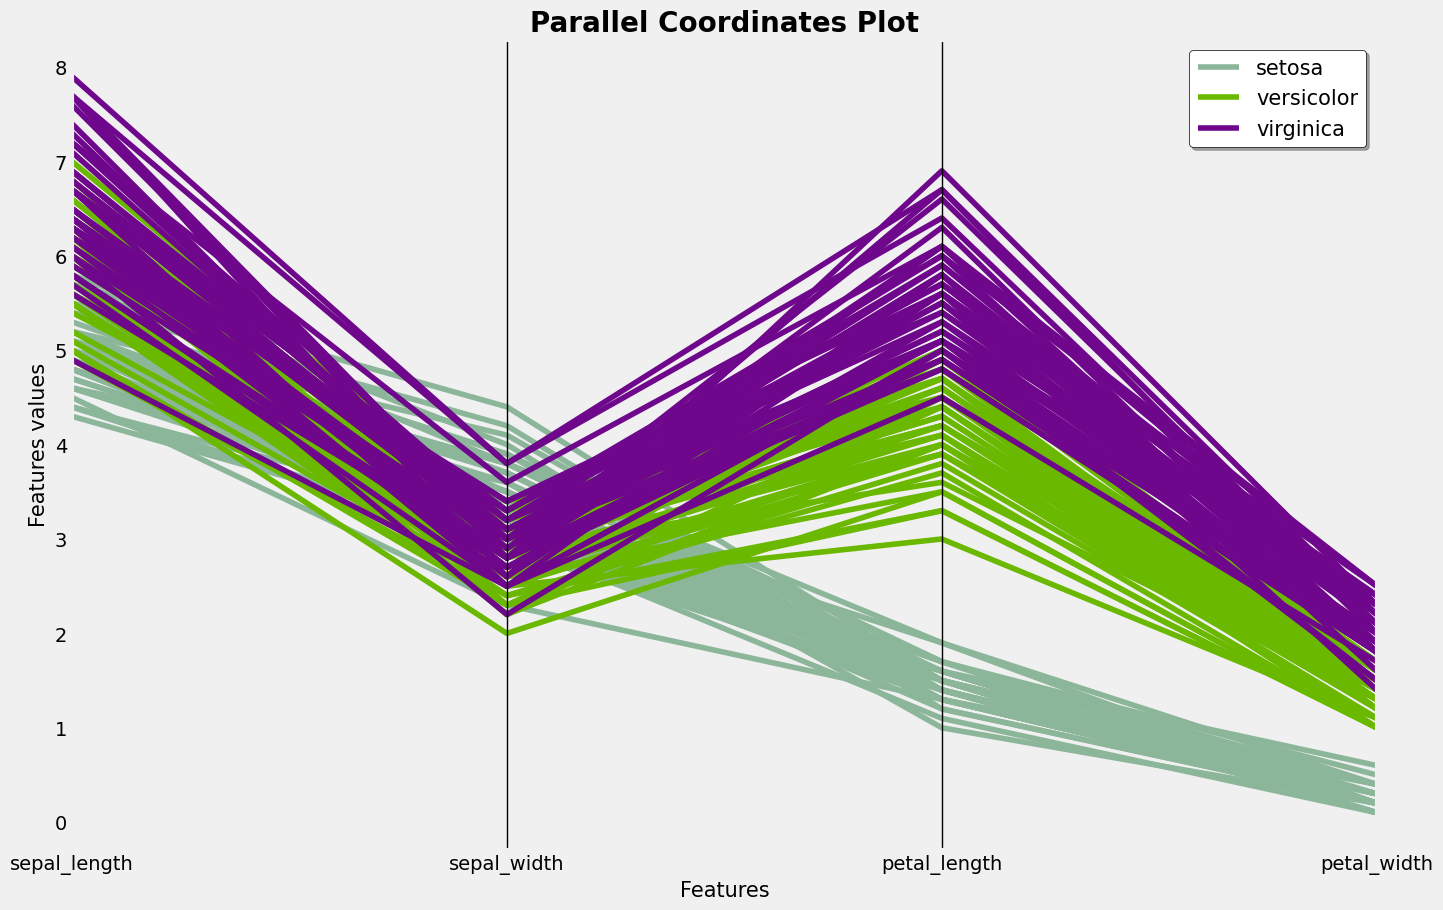

In [39]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 3.2. Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

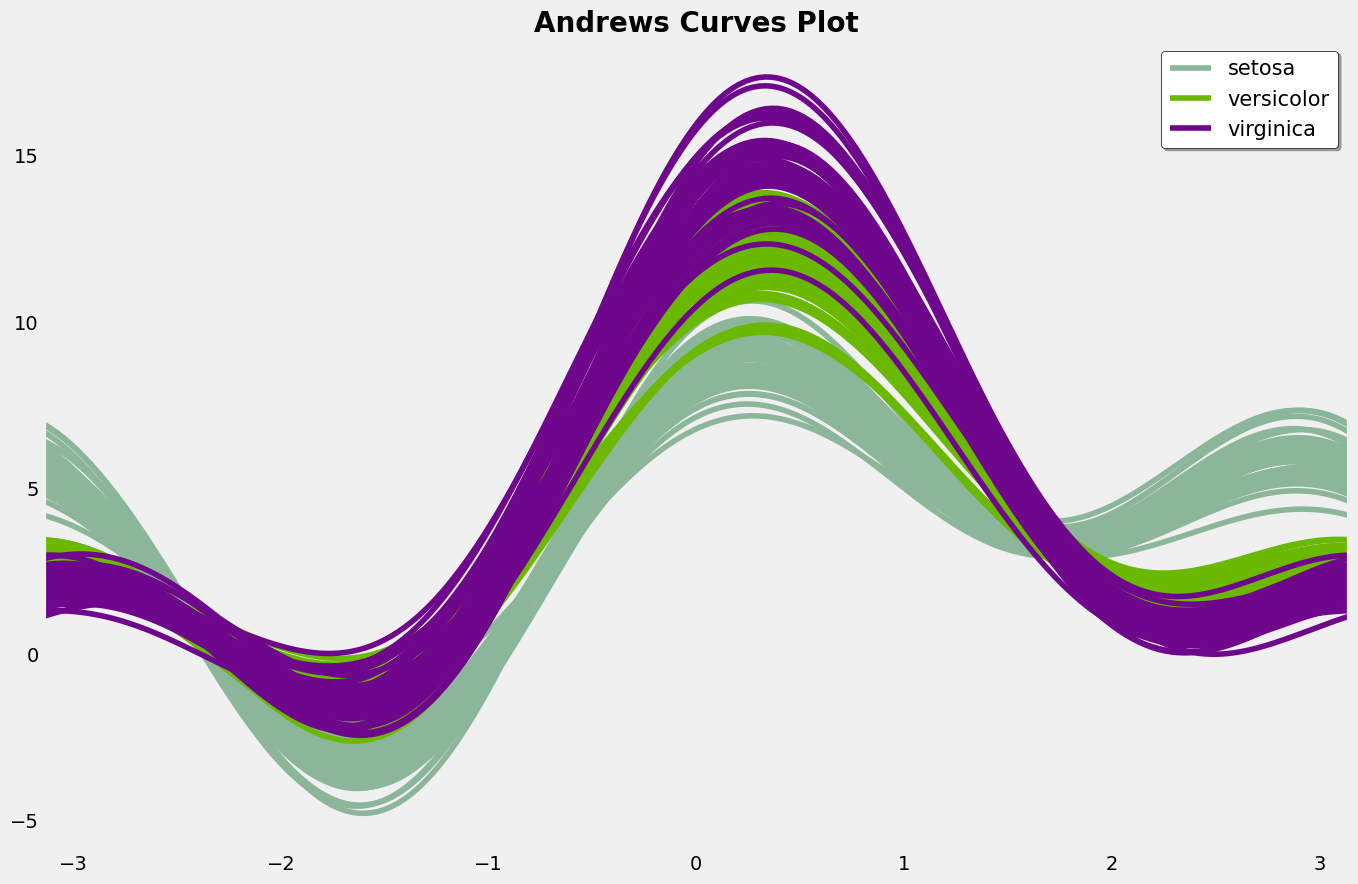

In [40]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 3.3. Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.  If you have more or fewer than 3 labels (target variables), you will need to adjust markers= (add or remove specific markers) or simply remove it and accept the default.

<Figure size 640x480 with 0 Axes>

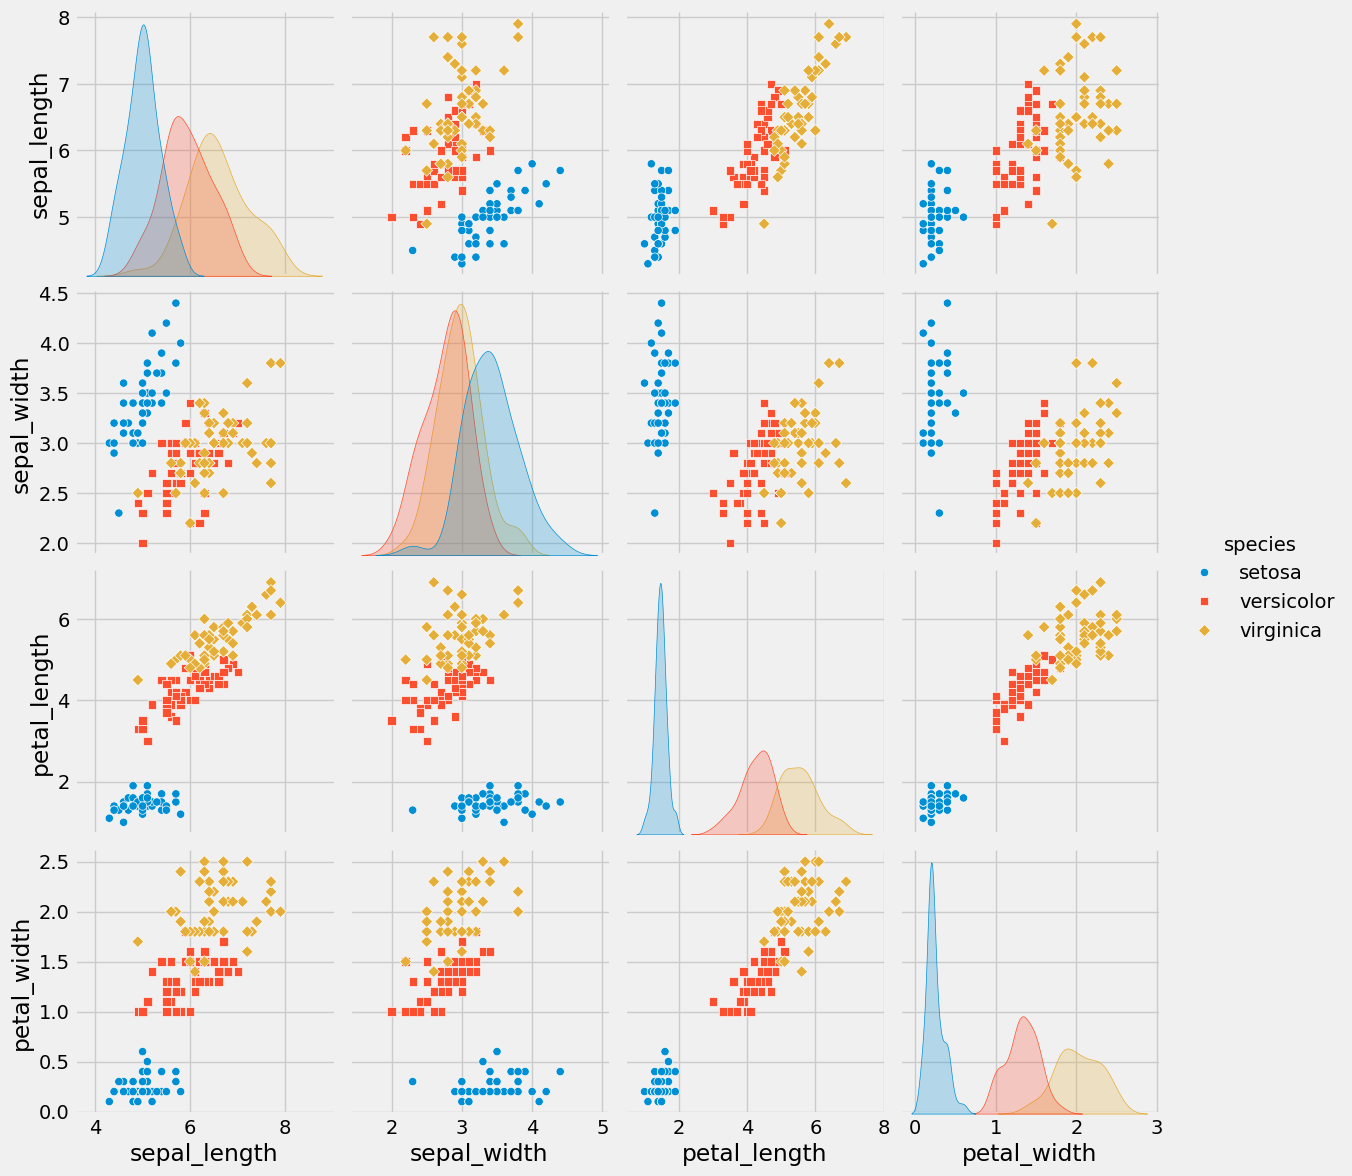

In [41]:
plt.figure()
sns.pairplot(dataset, hue = "species", height=3, markers=["o", "s", "D"])
plt.show()

#### 3.4. Boxplots
When applying Boxplots to a different dataset, the parameters may need to be modified slightly depending on the data.  
See also:

[Matplotlib Boxplot Documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

[Matplotlib Boxplot Demo](https://matplotlib.org/3.5.1/gallery/pyplots/boxplot_demo_pyplot.html)


<Figure size 640x480 with 0 Axes>

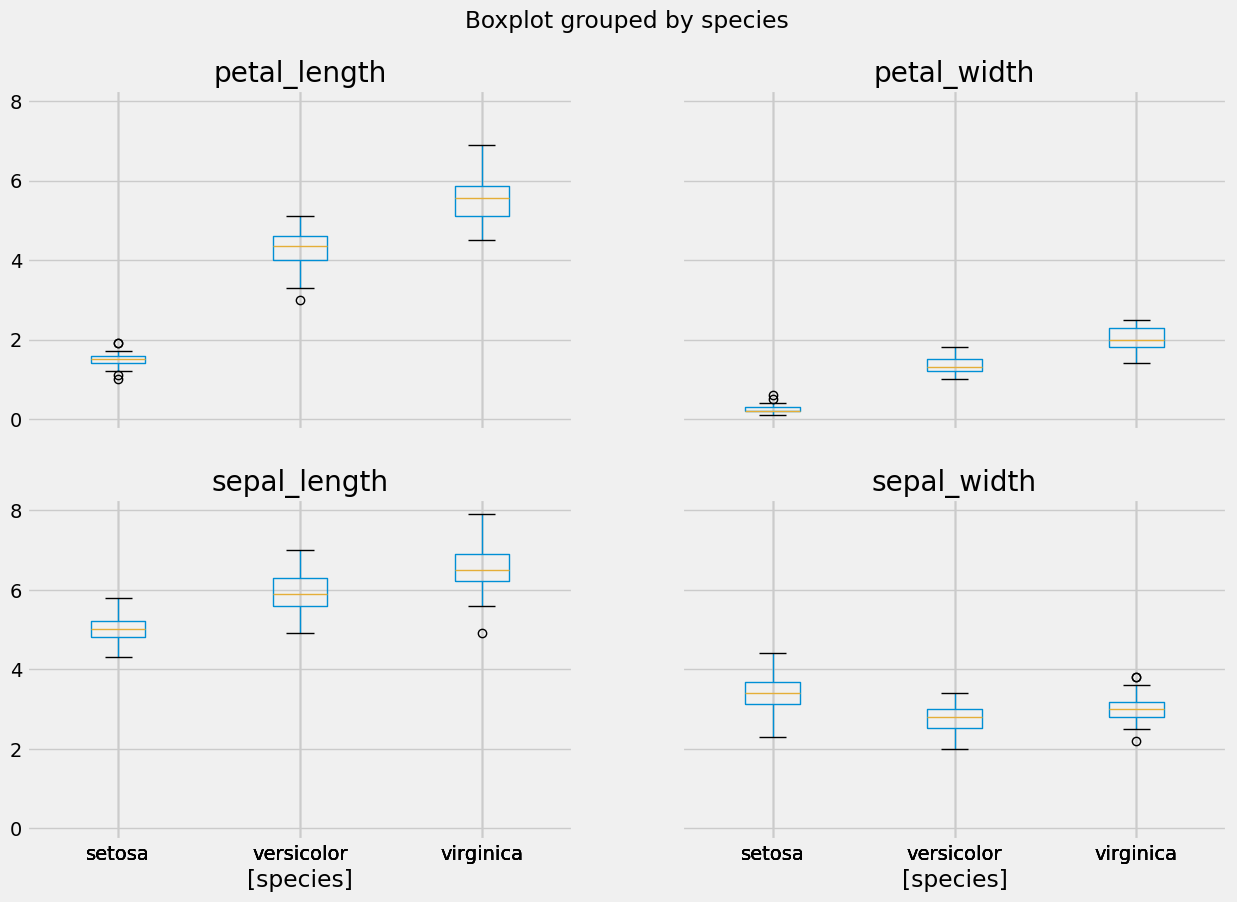

In [42]:
plt.figure()
dataset.boxplot(by="species", figsize=(15, 10))
plt.show()

#### 3.5 Correlation Heatmap

In [45]:
plt.figure(figsize=(20,12))
#draws heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(dataset.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'setosa'

<Figure size 2000x1200 with 0 Axes>

### 4. Using KNN for classification¶


##### 4.1. Making predictions¶
The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation. We'll start with 3. 5 is also a common starting point.


In [48]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### 4.2 Evaluating predictions

In [49]:
confusion_matrix(y_test,y_pred)


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

Confusion matrix may seem like an odd name, but it really serves to tell us how much confusion (error) there is in the model and what type of error.  Each column of the matrix shows predictions (0,1 or 2 for Iris species).  Each row shows the actual Iris species.  So the top and middle rows (0 and 1 in Python numbering) show that all 10 instances of Iris-setosa (0) and all 10 instances of Iris-versicolor (1) were predicted correctly.  The bottom row (2) shows us that the 8 of the 10 instances of Iris-virginica (2) were predicted correctly; 2 were misidentified as Iris-versicolor (1).


Below pandas has a built-in functionality that makes the confusion matrix slightly more readable.

In [50]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,10,0,10
2,0,2,8,10
All,10,12,8,30


A **Classification Report** is often used in tandem with the confusion matrix.  

*   **Recall** refers to the model's ability to correctly identify the result.  Note recall for Iris-virginica (2) is 80%.  Recall for Iris-versicolor (1) is 100% because the model identified ALL Iris-versicolor instances.
*   **Precision** reflects successful identification within those identified.  Note Iris-virginica (2) precision is 100%, because of the 8 instances identified as Iris-virginica, all were correct.  Precision for Iris-versicolor (1) is 83% which corresponds to 10 correct of 12 predictions.
*   **F1-score** is a weighted average of Recall and Precision.
*   **Accuracy** represents overall accuracy of the model.






In [51]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Calculating model accuracy

In [52]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.33 %.


#### 4.3. Using cross-validation for parameter tuning

Method 1

In [53]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

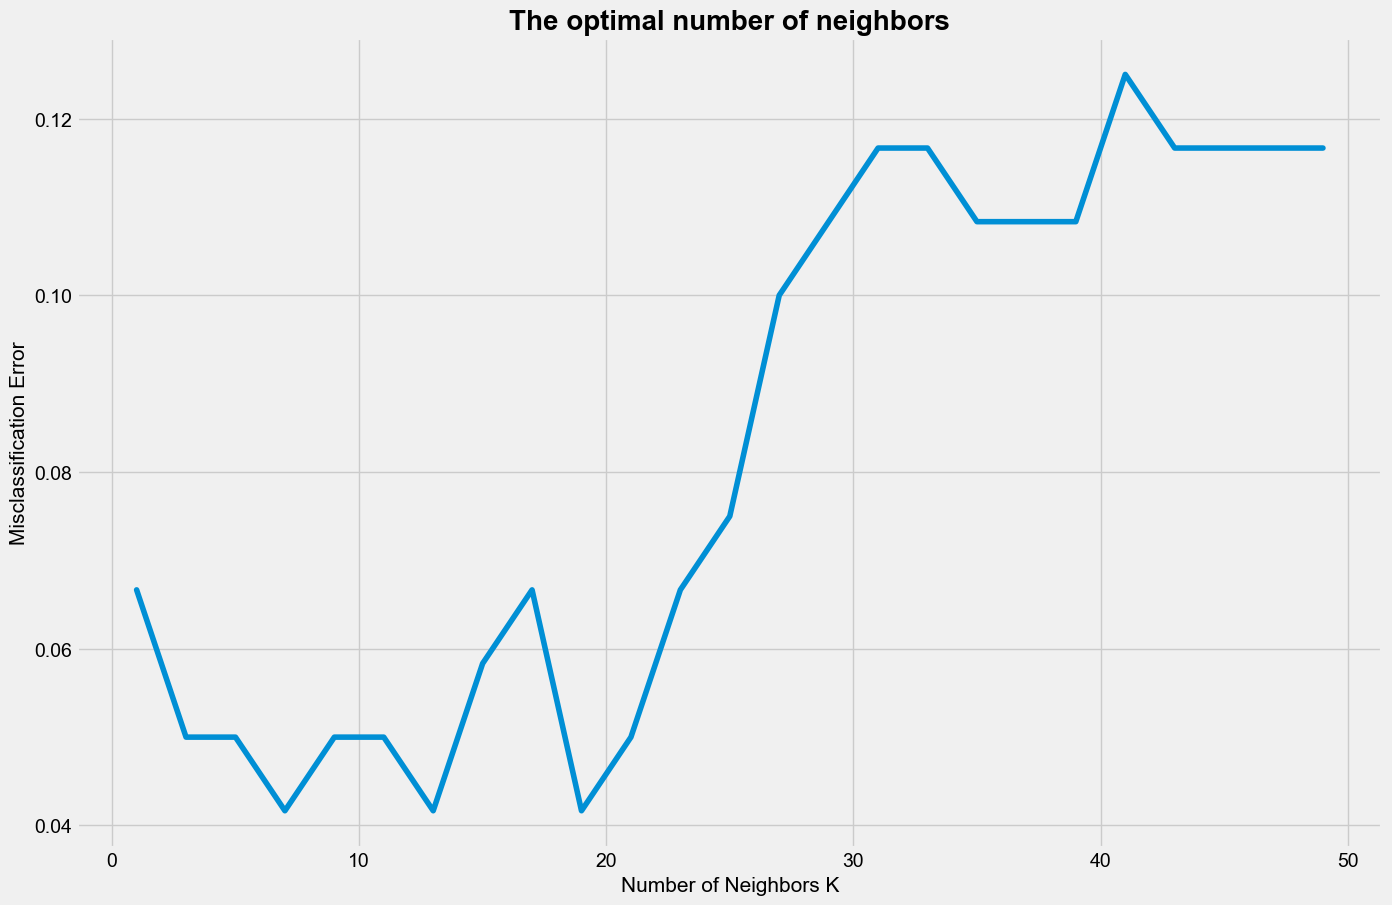

In [54]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [55]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


Method 2

In [56]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Mean Error')

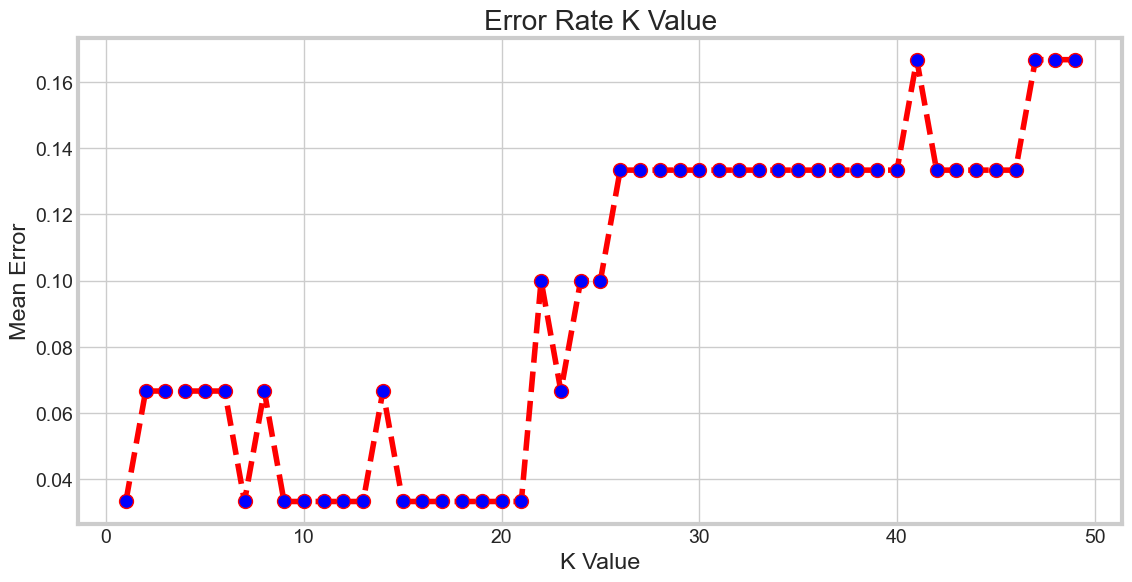

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**GridSearch Cross-Validation**

Normally in machine learning, the data set is divided into training and testing sets.  We use the training data to train the model and the testing set to evaluate performance. This may lead to problems in variance, however, which is when different combinations of training/testing sets lead to different results.

For this reason, we perform cross-validation.  GridSearchCV is one form of cross-validation provided by Scikit Learn.  We're basically going to send a dictionary of parameters, defined below as param_grid, defining our model (n_neighbors) and sending various values for K, number of neighbors.  Then we re-run the model with a subsets of the data.  In the case below, cv=5 means that we are conducting a 5-fold cross validation.  We will create 5 subsets of the data.  In the first iteration (or 'fold'), sets 1-4 are used as the training set and set 5 as testing.  In the second fold, sets 1-3 and 5 might be used for training and set 4 for testing, and so on.  At any rate, rotating through various sets helps us to conduct cross-validation and reduce variance.

In [58]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [59]:
#print the best score obtained during GridSearchCV
knn_cv.best_score_


0.9800000000000001

In [60]:
# and the optimal number of neighbors (note different techniques may identify different results for 'optimal number')
knn_cv.best_params_

{'n_neighbors': 6}